In [66]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# check the negative GPP among CO2 experiments

## use the following shell script to get the climatology monthly GPP

```bash
#!/usr/bin/env bash


E3SM_simu_dir=../E3SM_simulations/
E3SM_case_nam=2025-02-14.trans_EXPAI_RUBISCO_CMIP6_phase3_xco2_nofire.I20TRCNPRDCTCBC.hcru_hcru.pm-cpu.intel_001

for ni in `seq 1 4`; do
    strinst=`printf "%04d" $ni`
    filename=${E3SM_simu_dir}/${E3SM_case_nam}/run/${E3SM_case_nam}.elm_${strinst}.h0.
    cdo -mergetime -apply,-selname,GPP [ ${filename}*.nc ] GPP_fixed_${strinst}.nc
    cdo ymonmean GPP_fixed_${strinst}.nc GPP_fixed_${strinst}_clim_mon.nc
done
```

## use the following notebook to check the negative GPP

In [50]:
ds1 = xr.open_dataset("/global/homes/m/minxu/scratch/test/GPP_fixed_0001_clim_mon.nc")
ds2 = xr.open_dataset("/global/homes/m/minxu/scratch/test/GPP_fixed_0002_clim_mon.nc")
ds4 = xr.open_dataset("/global/homes/m/minxu/scratch/test/GPP_fixed_0004_clim_mon.nc")

In [52]:
import cftime as cf
time_units = "days since 1900-01-01 00:00:00"
ds1["time"] = cf.num2date(cf.date2num(ds1.time, units=time_units, calendar="noleap")-15., units=time_units, calendar="noleap")
ds2["time"] = cf.num2date(cf.date2num(ds2.time, units=time_units, calendar="noleap")-15., units=time_units, calendar="noleap")
ds4["time"] = cf.num2date(cf.date2num(ds4.time, units=time_units, calendar="noleap")-15., units=time_units, calendar="noleap")

In [108]:
factor = 86400 * 1.e-3
annsum1 = (ds1["GPP"] * ds1.time.dt.days_in_month * factor).groupby("time.year").sum(dim="time", skipna=False)
annsum2 = (ds2["GPP"] * ds2.time.dt.days_in_month * factor).groupby("time.year").sum(dim="time", skipna=False)
annsum4 = (ds4["GPP"] * ds4.time.dt.days_in_month * factor).groupby("time.year").sum(dim="time", skipna=False)
da21 = (annsum2-annsum1)
da41 = (annsum4-annsum1)

In [109]:
titles = ["difference" + " [< 0 grid count=" + str(np.sum(da21 < 0.).data)+"]", "ambient CO2", "+100 CO2", "abmient CO2"]

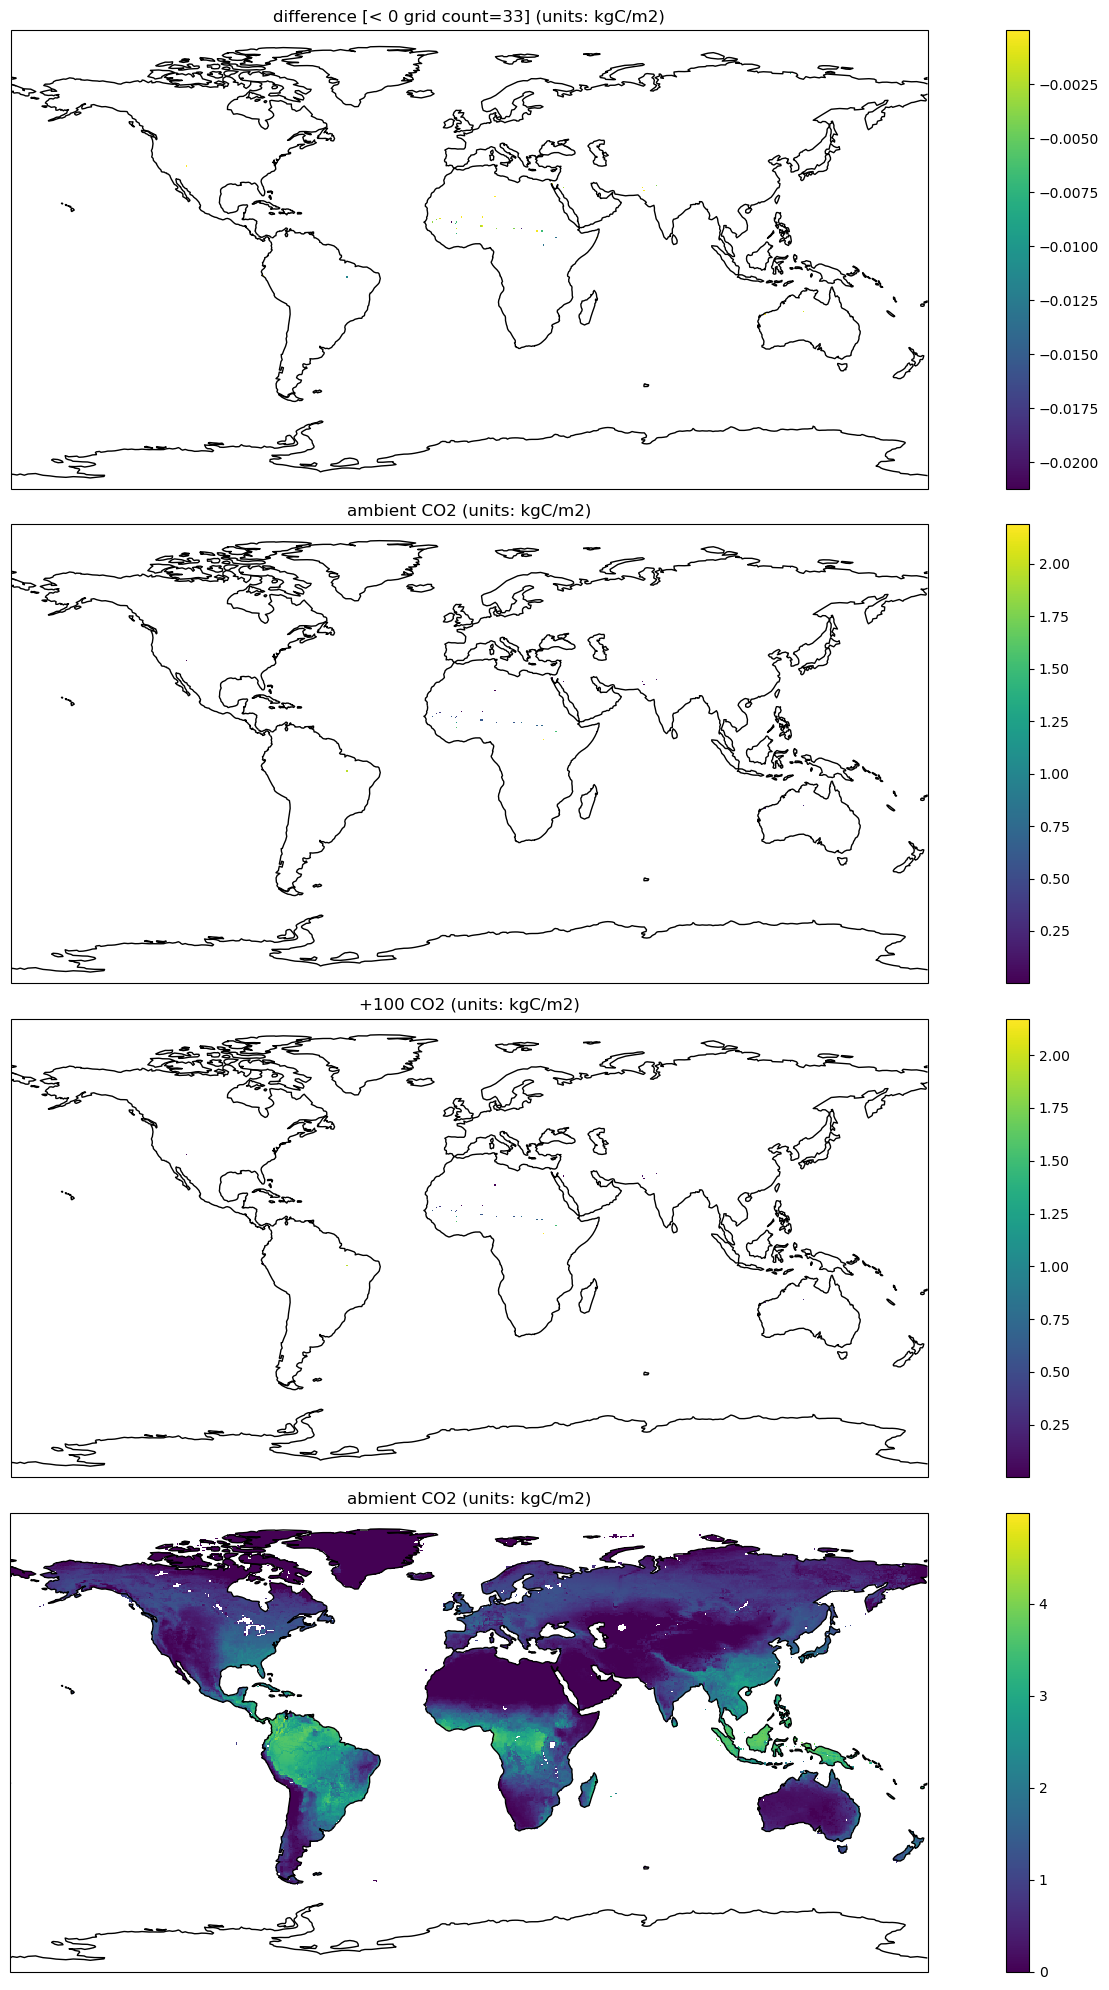

In [110]:
fig, ax = plt.subplots(4, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(16, 20))

da21.where(da21 < 0, drop=False).plot(ax=ax[0])
annsum1.where(da21 < 0, drop=False).plot(ax=ax[1])
annsum2.where(da21 < 0, drop=False).plot(ax=ax[2])
annsum1.plot(ax=ax[3])
fig.tight_layout()
for k, x in enumerate(ax):
    x.coastlines()
    x.set_title(titles[k] + " (units: kgC/m2)")

In [111]:
titles = ["difference" + " [< 0 grid count=" + str(np.sum(da41 < 0.).data)+"]", "ambient CO2", "+400 CO2", "abmient CO2"]

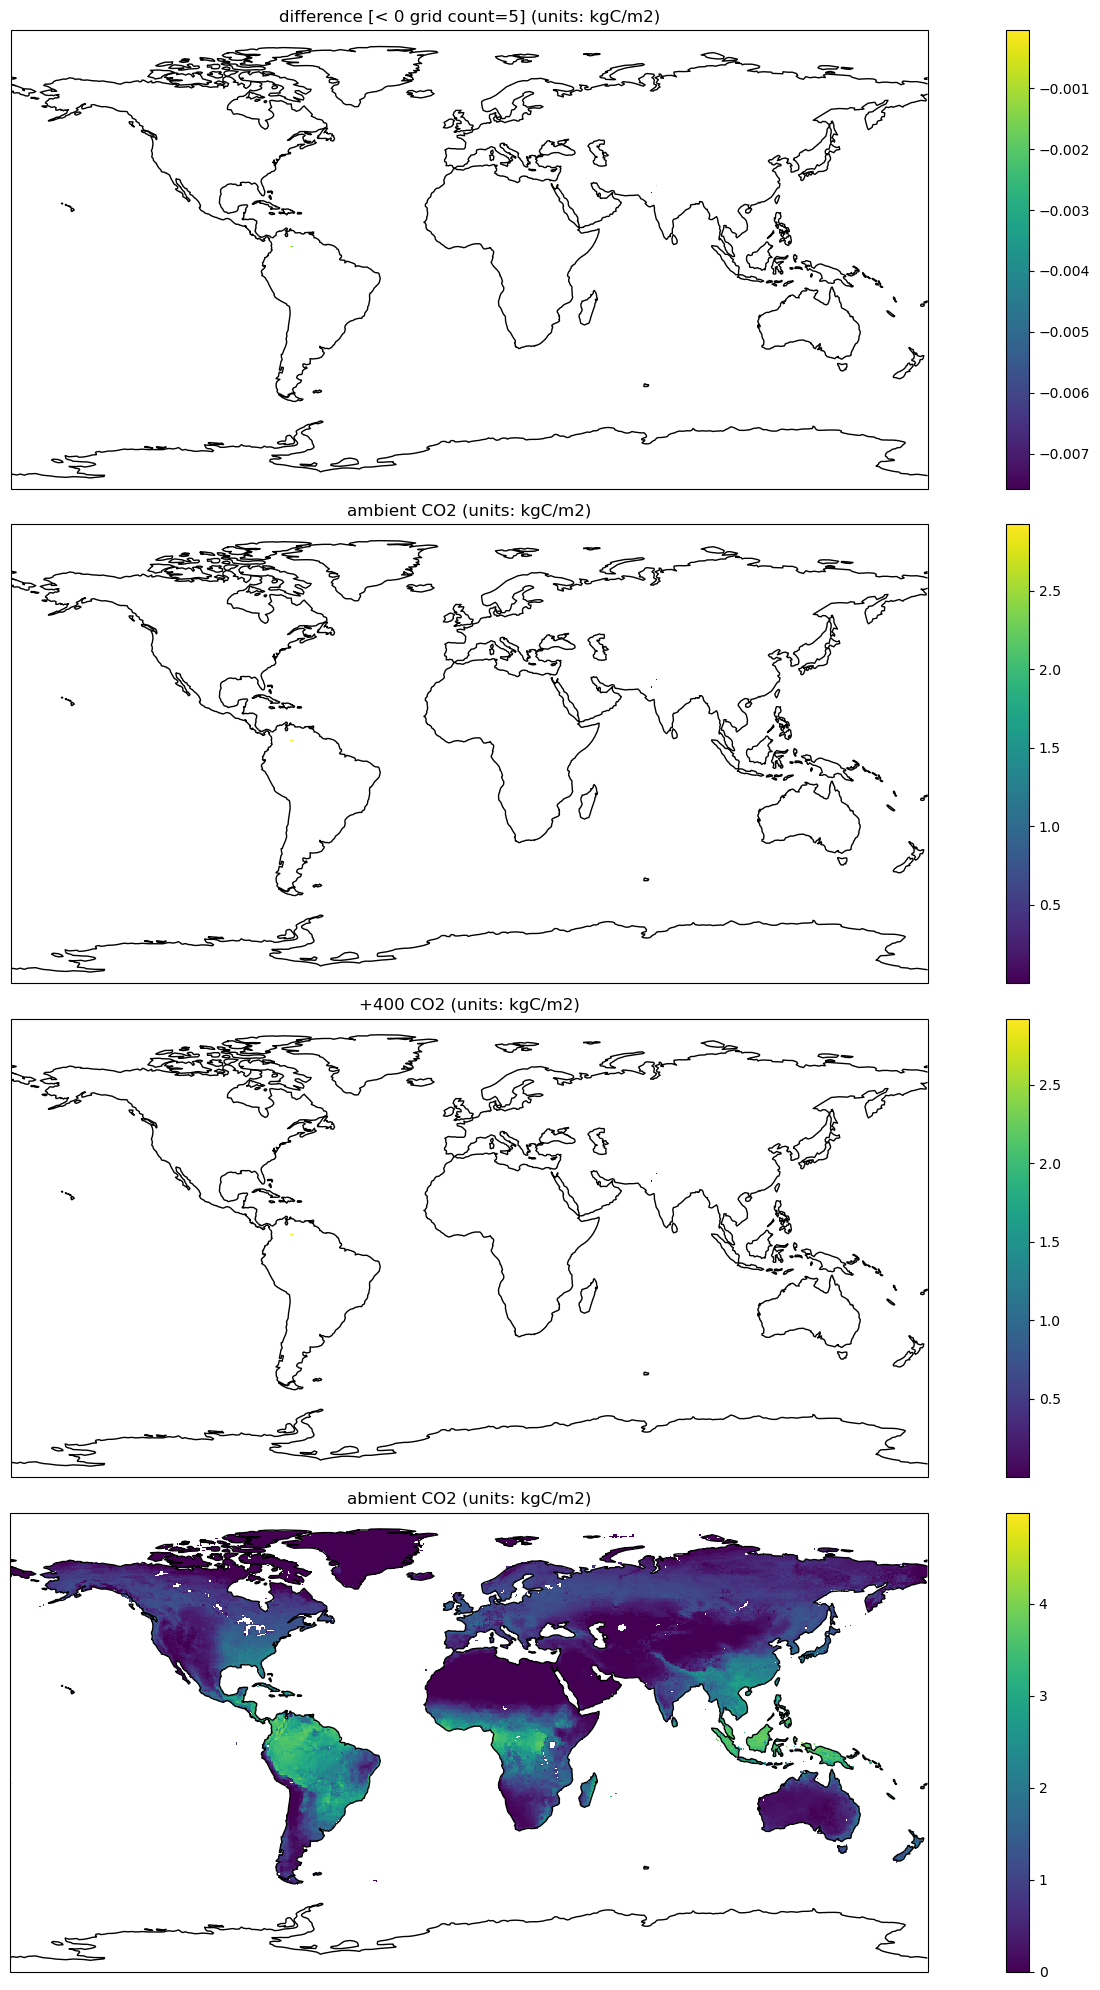

In [112]:
fig, ax = plt.subplots(4, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(16, 20))

da41.where(da41 < 0, drop=False).plot(ax=ax[0])
annsum1.where(da41 < 0, drop=False).plot(ax=ax[1])
annsum4.where(da41 < 0, drop=False).plot(ax=ax[2])
annsum1.plot(ax=ax[3])

fig.tight_layout()
for k, x in enumerate(ax):
    x.coastlines()
    x.set_title(titles[k] + " (units: kgC/m2)")

In [104]:
dn1 = xr.open_dataset("/global/homes/m/minxu/scratch/test/GPP_0001_clim_mon.nc")
dn2 = xr.open_dataset("/global/homes/m/minxu/scratch/test/GPP_0002_clim_mon.nc")
dn4 = xr.open_dataset("/global/homes/m/minxu/scratch/test/GPP_0004_clim_mon.nc")

In [105]:
dn1["time"] = cf.num2date(cf.date2num(dn1.time, units=time_units, calendar="noleap")-15., units=time_units, calendar="noleap")
dn2["time"] = cf.num2date(cf.date2num(dn2.time, units=time_units, calendar="noleap")-15., units=time_units, calendar="noleap")
dn4["time"] = cf.num2date(cf.date2num(dn4.time, units=time_units, calendar="noleap")-15., units=time_units, calendar="noleap")

In [113]:
factor = 86400 * 1.e-3
annsum1n = (dn1["GPP"] * dn1.time.dt.days_in_month * factor).groupby("time.year").sum(dim="time", skipna=False)
annsum2n = (dn2["GPP"] * dn2.time.dt.days_in_month * factor).groupby("time.year").sum(dim="time", skipna=False)
annsum4n = (dn4["GPP"] * dn4.time.dt.days_in_month * factor).groupby("time.year").sum(dim="time", skipna=False)
da21n = (annsum2n-annsum1n)
da41n = (annsum4n-annsum1n)

In [115]:
titles = ["difference" + " [< 0 grid count=" + str(np.sum(da21n < 0.).data)+"]", "ambient CO2", "+100 CO2 +5N", "abmient CO2"]

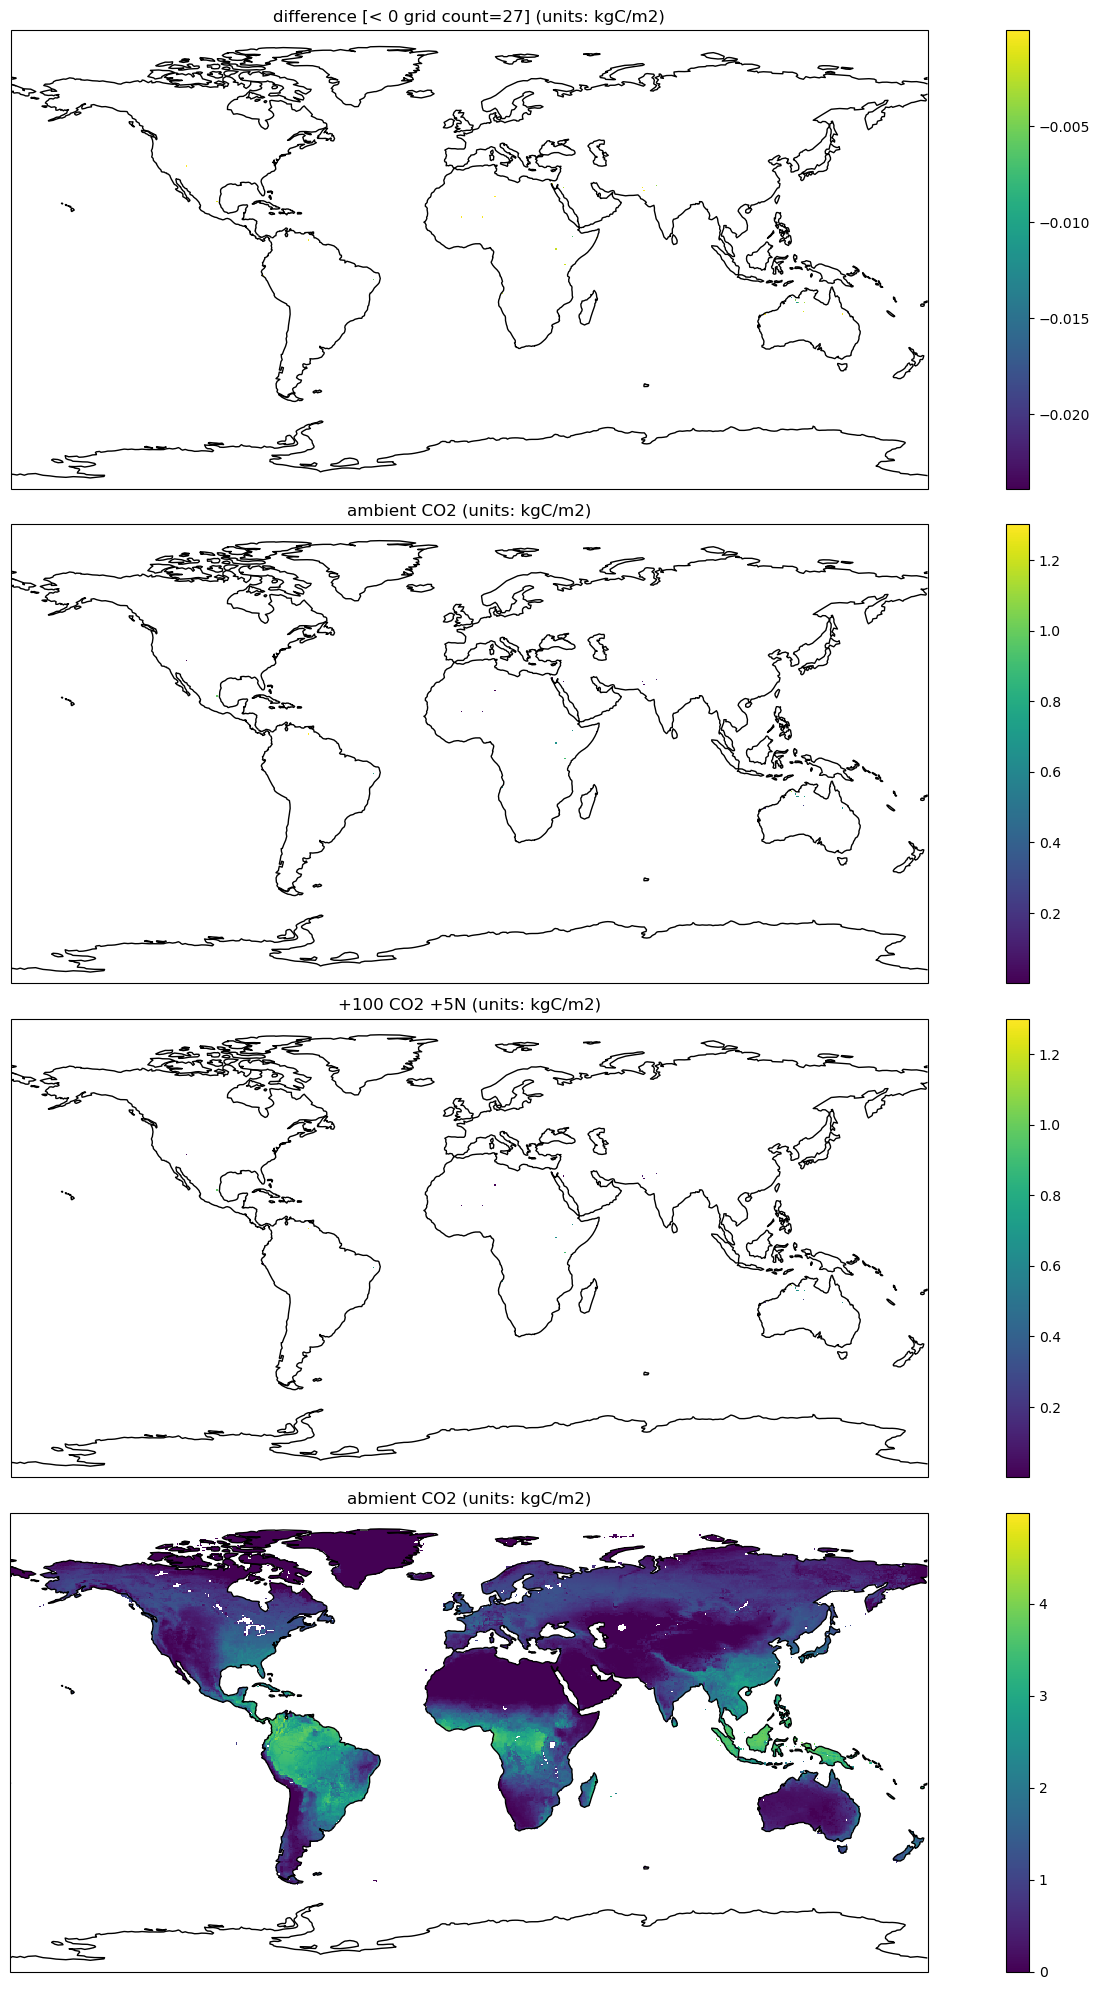

In [116]:
fig, ax = plt.subplots(4, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(16, 20))

da21n.where(da21n < 0, drop=False).plot(ax=ax[0])
annsum1n.where(da21n < 0, drop=False).plot(ax=ax[1])
annsum2n.where(da21n < 0, drop=False).plot(ax=ax[2])
annsum1n.plot(ax=ax[3])
fig.tight_layout()
for k, x in enumerate(ax):
    x.coastlines()
    x.set_title(titles[k] + " (units: kgC/m2)")

In [117]:
titles = ["difference" + " [< 0 grid count=" + str(np.sum(da41n < 0.).data)+"]", "ambient CO2", "+400 CO2 +30N", "abmient CO2"]

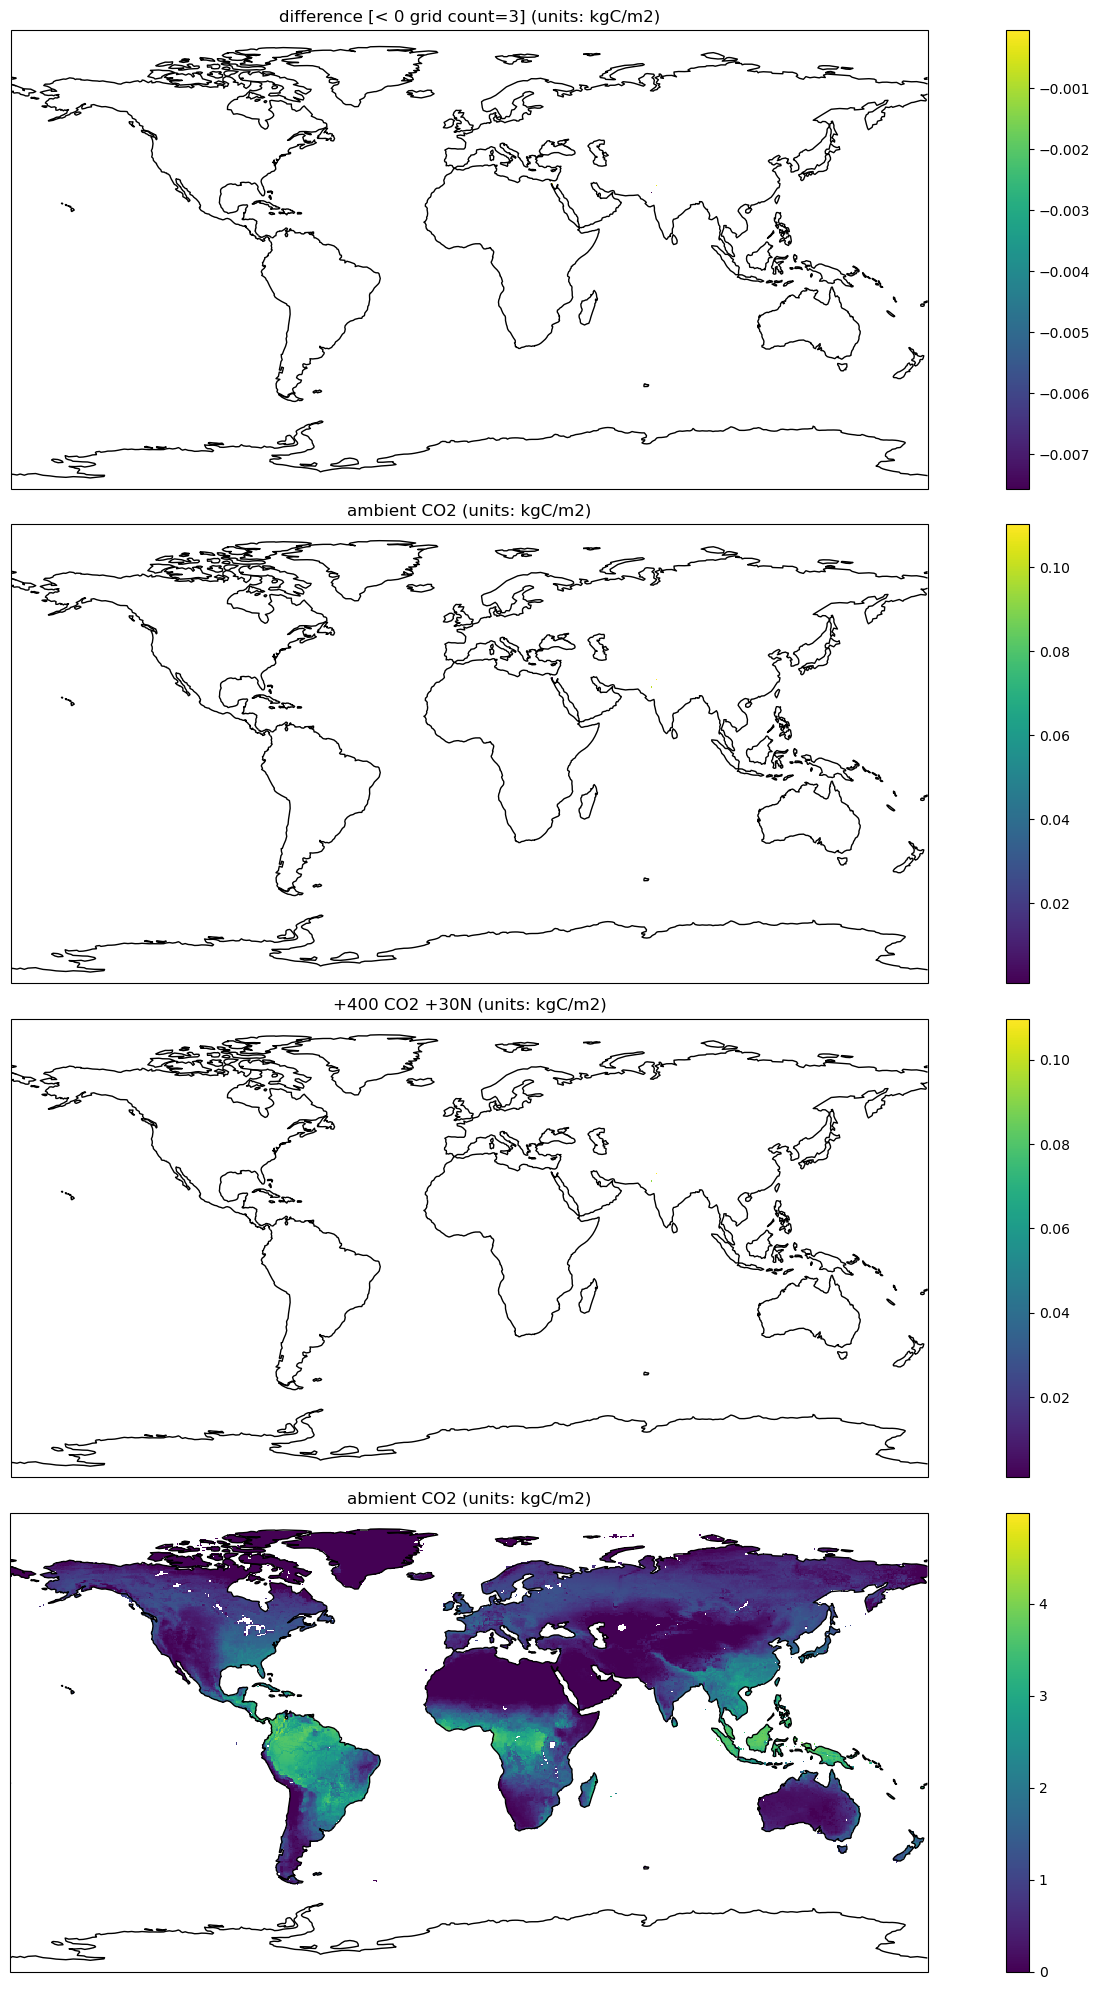

In [118]:
fig, ax = plt.subplots(4, 1, subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(16, 20))

da41n.where(da41n < 0, drop=False).plot(ax=ax[0])
annsum1n.where(da41n < 0, drop=False).plot(ax=ax[1])
annsum4n.where(da41n < 0, drop=False).plot(ax=ax[2])
annsum1n.plot(ax=ax[3])

fig.tight_layout()
for k, x in enumerate(ax):
    x.coastlines()
    x.set_title(titles[k] + " (units: kgC/m2)")